In [1]:
#checking the ta-lib installation is correct

import talib
print("TA-Lib version:", talib.__version__)


TA-Lib version: 0.5.1


In [2]:
import sys
import os

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

# Importing the module
import finance_utils as fu

# Loading stock price data
file_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-01\\data\\GOOG_historical_data.csv'
stock_data = fu.load_stock_data(file_path)

# Prepare the data
prepared_data = fu.prepare_stock_data(stock_data) 


# Display the first few rows of the processed data
print(prepared_data.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1 2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2 2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3 2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4 2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
# Import the module
import technical_analysis_indicator as ta

# Add a 20-day Simple Moving Average (SMA) to the prepared data
prepared_data = ta.add_sma(prepared_data, period=20)

# Add a 14-day Relative Strength Index (RSI) to the prepared data
prepared_data = ta.add_rsi(prepared_data, period=14)

# Add Bollinger Bands to the prepared data
prepared_data = ta.add_bollinger_bands(prepared_data, period=20)

# Add MACD to the prepared data
prepared_data = ta.add_macd(prepared_data)


# To handle NaN values
prepared_data = prepared_data.dropna()

# Display the first few rows
print(prepared_data.head(10))


         Date      Open      High       Low     Close  Adj Close     Volume  \
33 2004-10-06  3.425909  3.448325  3.387304  3.414203   3.410322  268900140   
34 2004-10-07  3.410218  3.483941  3.401002  3.458287   3.454356  283643194   
35 2004-10-08  3.455050  3.478960  3.412708  3.430392   3.426493  222442656   
36 2004-10-11  3.412210  3.458537  3.333754  3.368873   3.365044  210437827   
37 2004-10-12  3.348449  3.427403  3.322546  3.422173   3.418283  234419380   
38 2004-10-13  3.569620  3.575349  3.488923  3.509346   3.505357  397203256   
39 2004-10-14  3.512086  3.546208  3.451065  3.536743   3.532723  209835578   
40 2004-10-15  3.609720  3.623917  3.535498  3.589296   3.585216  265150137   
41 2004-10-18  3.566631  3.716071  3.517067  3.715075   3.710852  282061287   
42 2004-10-19  3.748450  3.795773  3.669994  3.684689   3.680501  363918964   

    Dividends  Stock Splits    SMA_20        RSI  BB_upper  BB_middle  \
33        0.0           0.0  3.007739  77.222667  3.52295

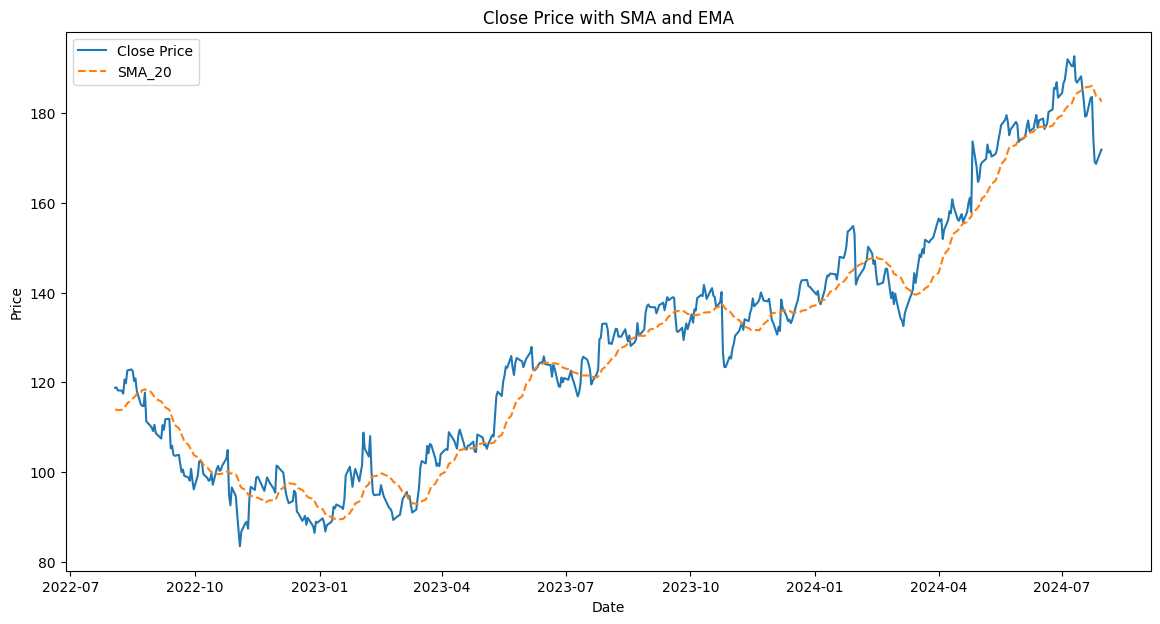

In [4]:
import visualization_utils as vu

# plot of the stock's close price with SMA and EMA with limited rows
vu.plot_close_with_moving_averages(prepared_data, num_rows=500)


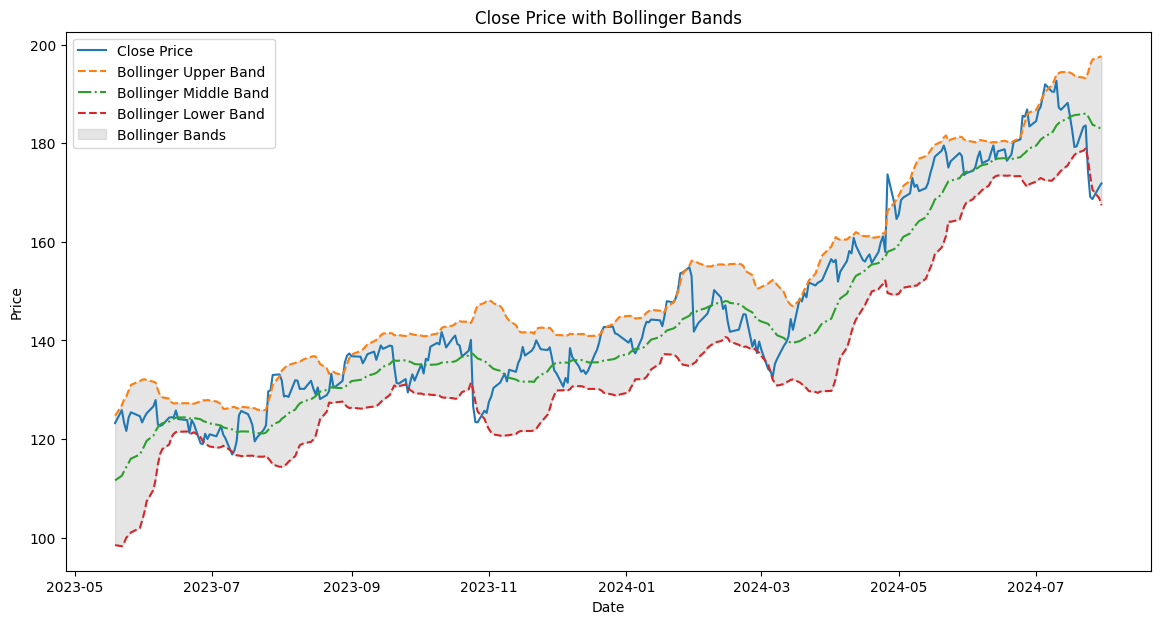

In [5]:
# plot of the stock's close price with Bollinger Bands with limited rows
vu.plot_bollinger_bands(prepared_data, num_rows=300)



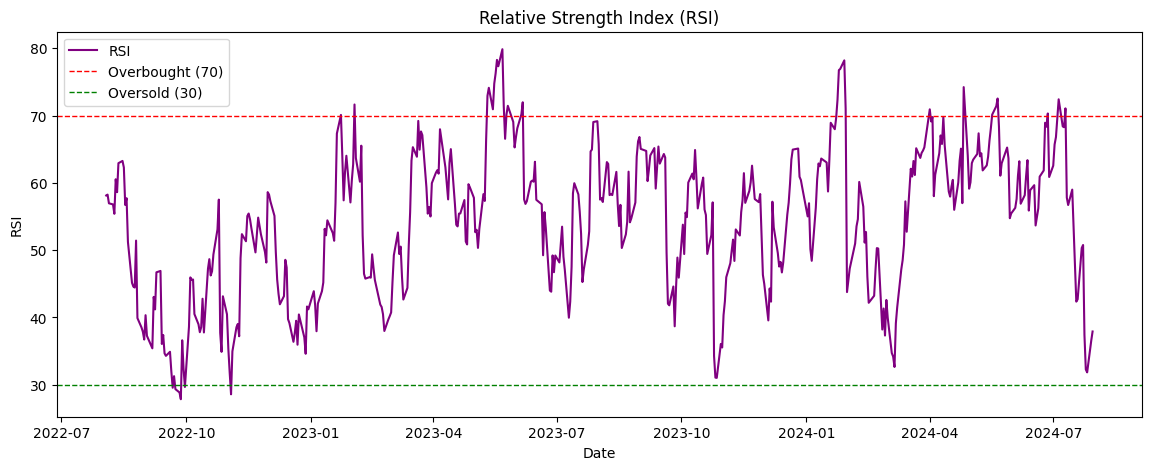

In [6]:
# plot of the RSI (Relative Strength Index) with limited rows
vu.plot_rsi(prepared_data, num_rows=500)

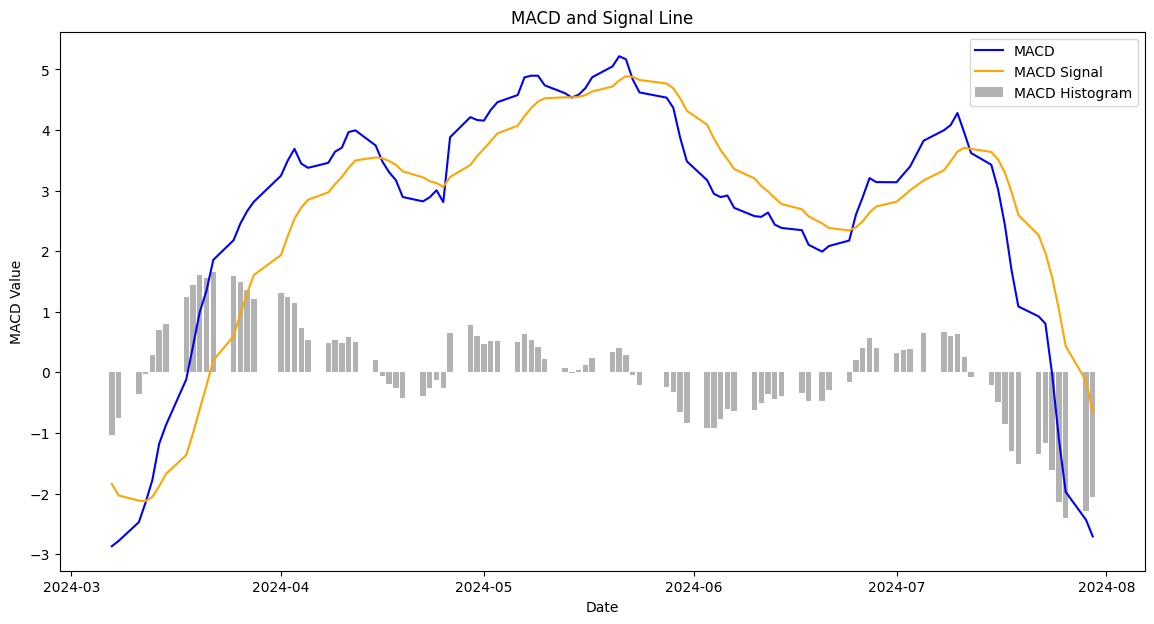

In [7]:
# plot the MACD (Moving Average Convergence Divergence) with limited rows
vu.plot_macd(prepared_data, num_rows=100)

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-01\scripts\visualization_utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])


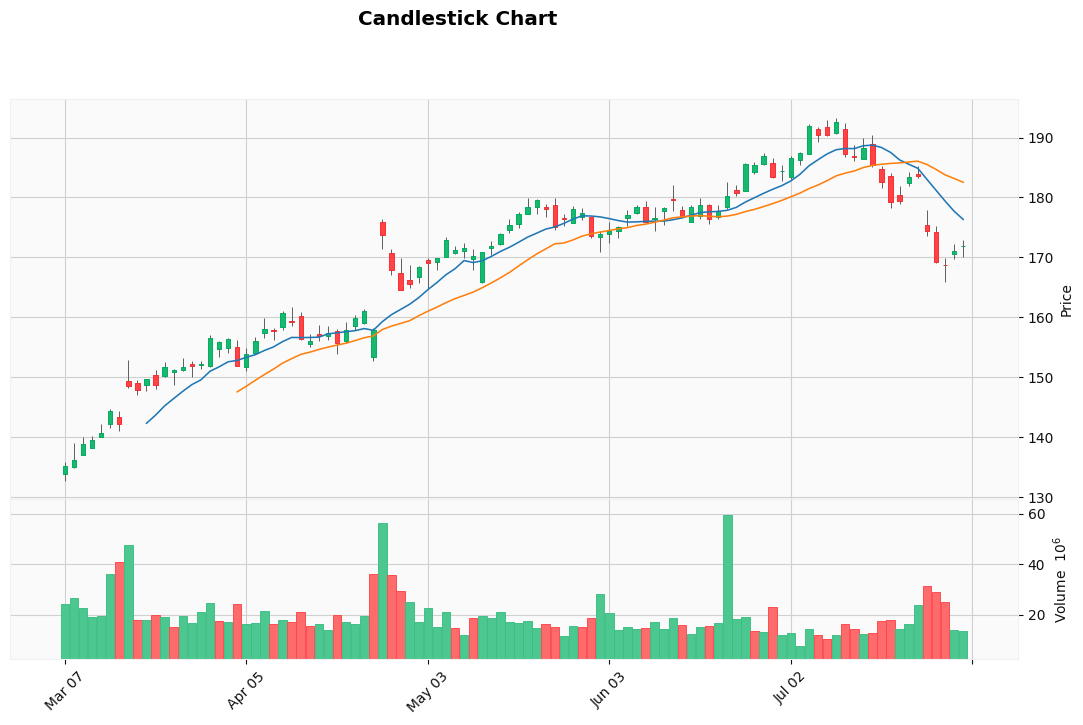

In [8]:
# plot of the candlestick chart with limited rows
vu.plot_candlestick_chart(prepared_data, num_rows=100)

In [9]:
# financial analysis using pynance 

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

import importlib
import pynance_analysis as pa
importlib.reload(pa)

# define stock symbol and data range
symbol = 'GOOG'
start_date = '2023-01-01'
end_date = '2023-12-31'

# fetch data using fetch_data function
data = pa.fetch_data(symbol, start_date, end_date)

# check the fetched data
print(data.head())
print(data.columns)



        Date    Open     High       Low   Close    Volume
0 2023-12-29  140.68  141.435  139.9000  140.93  14880961
1 2023-12-28  141.85  142.270  140.8283  141.28  12192549
2 2023-12-27  142.83  143.320  141.0512  141.44  17288358
3 2023-12-26  142.98  143.945  142.5001  142.82  11170066
4 2023-12-22  142.13  143.250  142.0550  142.72  18513524
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [10]:
# function for calculating technical indicator
data = pa.calculate_indicators(data)
print(data.head())


         Date     Open    High       Low   Close    Volume    SMA_20  \
19 2023-12-01  133.320  133.50  132.1517  133.32  24267987  136.9075   
20 2023-11-30  136.400  136.96  132.7900  133.92  29913531  136.5570   
21 2023-11-29  138.985  139.67  136.2950  136.40  21014715  136.3130   
22 2023-11-28  137.630  138.66  137.0400  138.62  17046868  136.1720   
23 2023-11-27  137.570  139.63  137.5400  138.05  17886389  135.9335   

        EMA_20        RSI  BB_middle    BB_upper    BB_lower      MACD  \
19  135.937453  34.261321   136.9075  144.987010  128.827990 -2.128602   
20  135.745314  38.700787   136.5570  144.508967  128.605033 -2.021143   
21  135.807665  46.770517   136.3130  143.947928  128.678072 -1.716084   
22  136.075507  52.587767   136.1720  143.506506  128.837494 -1.280427   
23  136.263554  58.470825   135.9335  142.641225  129.225775 -0.969979   

    MACD_signal  MACD_hist  
19    -1.707068  -0.421534  
20    -1.769883  -0.251260  
21    -1.759123   0.043039  
22    

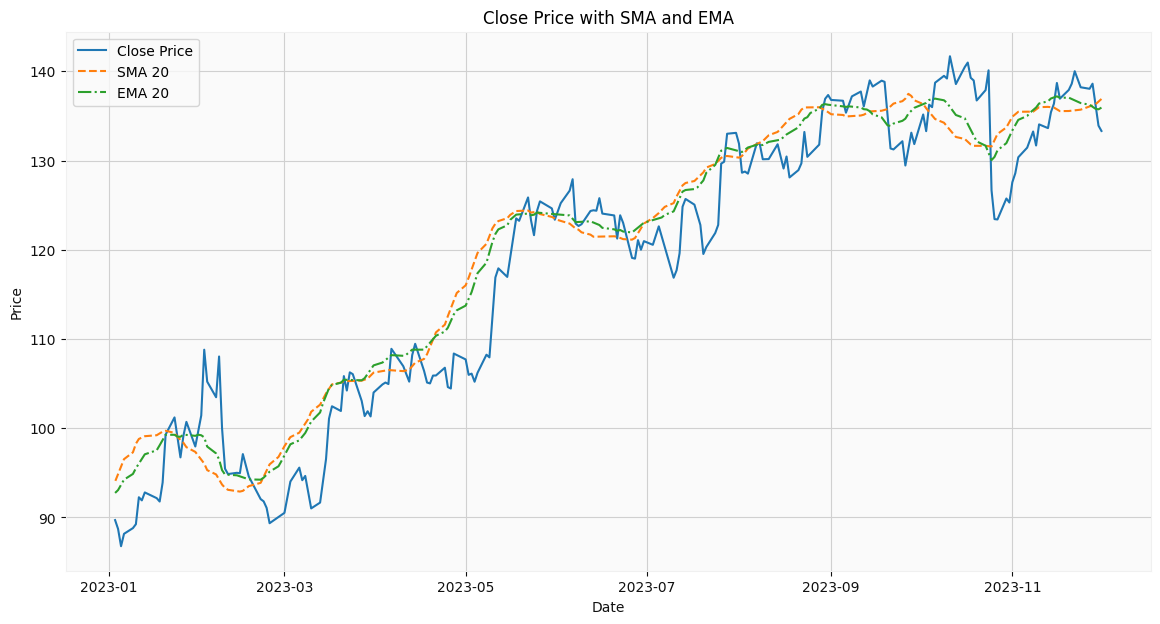

In [11]:
# visulazation of close price with sma amd ema 
pa.plot_close_with_indicators(data)

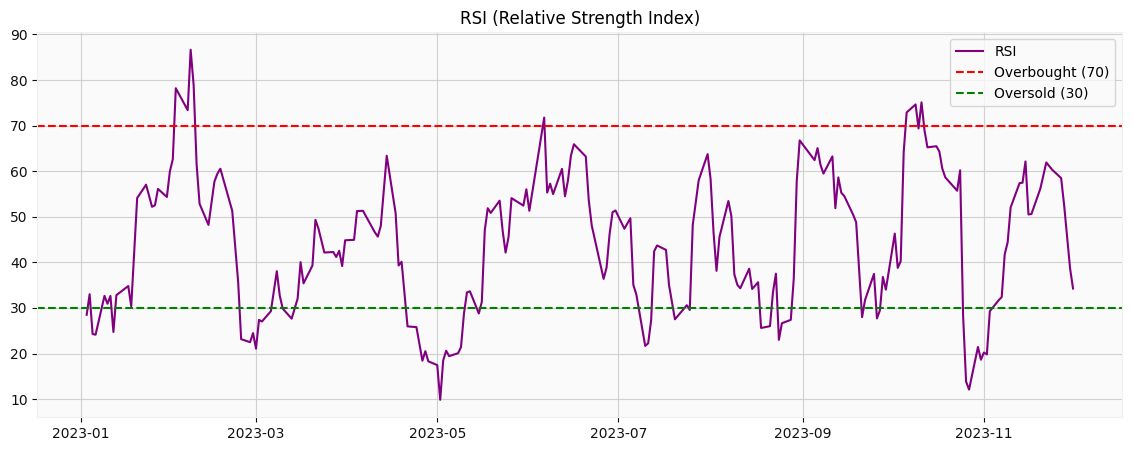

In [12]:

pa.plot_rsi(data)

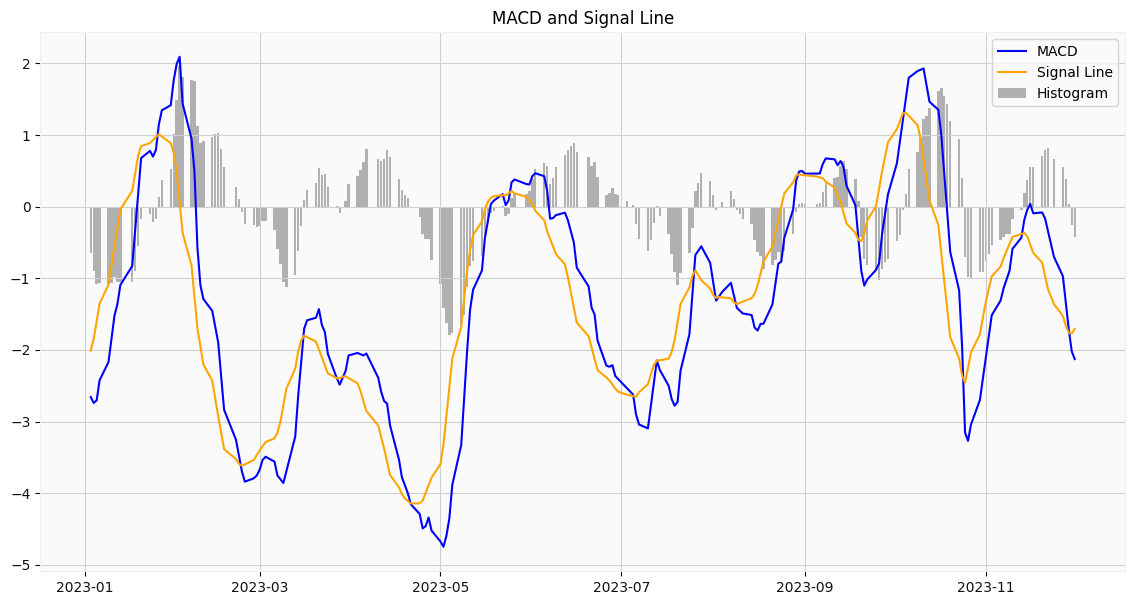

In [13]:
pa.plot_macd(data)

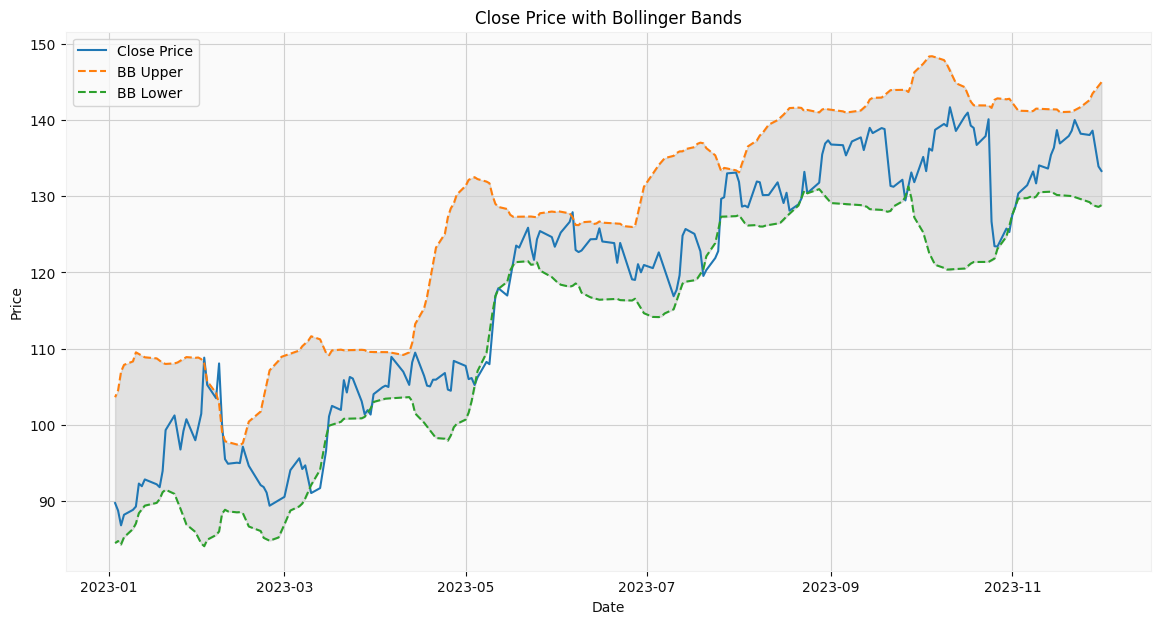

In [14]:
pa.plot_bollinger_bands(data)

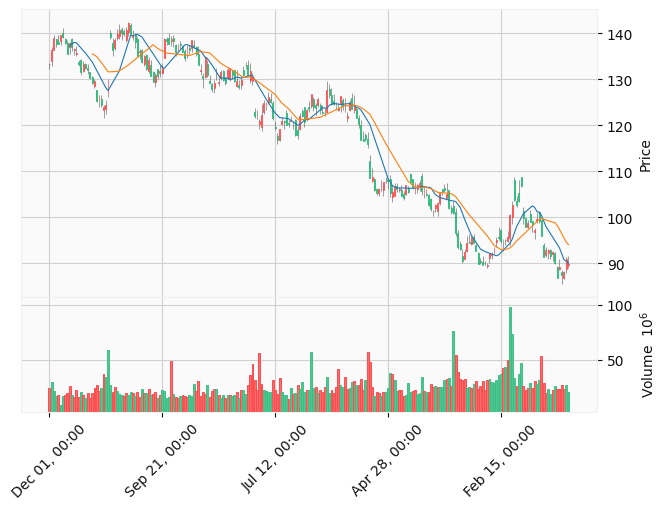

In [15]:
pa.plot_candlestick_chart(data)